In [112]:
# https://omes-va.com/reconocimiento-de-matriculas-vehiculares-opencv-pytesseract-ocr-python/
import cv2
import matplotlib.pyplot as plt
placa = []

In [119]:
image = cv2.imread('test04.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.blur(gray,(3,3))
canny = cv2.Canny(gray,150,200)
canny = cv2.dilate(canny,None,iterations=1)
#_,cnts,_ = cv2.findContours(canny,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnts,_ = cv2.findContours(canny,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
#cv2.drawContours(image,cnts,-1,(0,255,0),2)

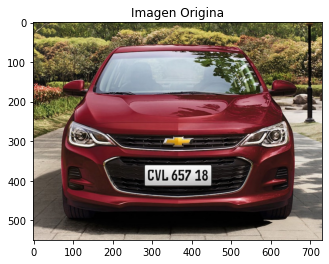

In [120]:
plt.title("Imagen Original") 
plt.imshow(cv2.cvtColor(image , cv2.COLOR_BGR2RGB))

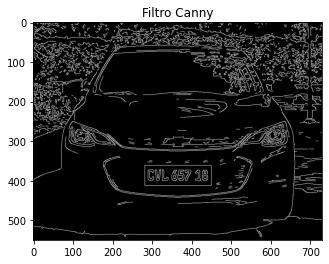

In [121]:
canny = cv2.Canny(gray,150,200)
plt.title("Filtro Canny") 
plt.imshow(cv2.cvtColor(canny , cv2.COLOR_BGR2RGB))

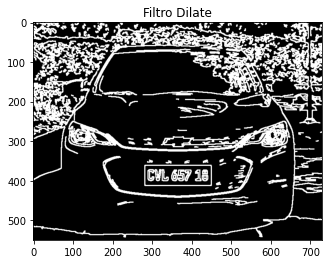

In [122]:
canny = cv2.dilate(canny,None,iterations=1)
plt.title("Filtro Dilate") 
plt.imshow(cv2.cvtColor(canny , cv2.COLOR_BGR2RGB))

area= 9007.0


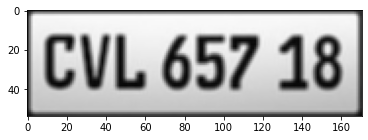

In [123]:
for c in cnts:
  area = cv2.contourArea(c)
  x,y,w,h = cv2.boundingRect(c)
  epsilon = 0.09*cv2.arcLength(c,True)
  approx = cv2.approxPolyDP(c,epsilon,True)
  
  if len(approx)==4 and area>9000:
    print('area=',area)
    #cv2.drawContours(image,[approx],0,(0,255,0),3)
    aspect_ratio = float(w)/h
    if aspect_ratio>2.4:
      placa = gray[y:y+h,x:x+w]
      
      #print('PLACA: ',text)
      #cv2.imshow('PLACA',placa)
      plt.imshow(cv2.cvtColor(placa , cv2.COLOR_BGR2RGB))
      cv2.moveWindow('PLACA',780,10)
      cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),3)
      #cv2.putText(image,text,(x-20,y-10),1,2.2,(0,255,0),3)

-1

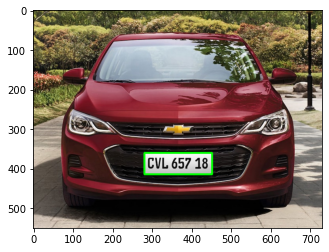

In [124]:
#cv2.imshow('Image',image)
plt.imshow(cv2.cvtColor(image , cv2.COLOR_BGR2RGB))
cv2.moveWindow('Image',45,10)
cv2.waitKey(0)